# 데이터 증강

In [1]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://storage.googleapis.com/download.tensorflow.org/data/rps.zip

--2022-08-10 03:15:04--  https://storage.googleapis.com/download.tensorflow.org/data/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.251.2.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M   253MB/s    in 0.8s    

2022-08-10 03:15:05 (253 MB/s) - ‘rps.zip’ saved [200682221/200682221]



In [3]:
!unzip -qq rps.zip

In [4]:
data_dir = '/content/rps'

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True,
    shear_range=0.5,
    brightness_range=[0.5,1.5],
    zoom_range=0.2,
    rotation_range = 30,
    fill_mode = 'nearest'
)

In [6]:
image_path ='/content/rps/rock/rock01-000.png'

img_rock = tf.keras.utils.load_img(image_path)
type(img_rock)

PIL.Image.Image

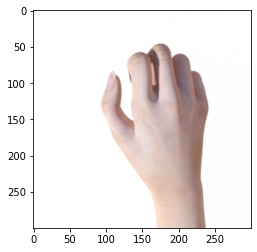

In [7]:
plt.imshow(img_rock)
plt.show()

In [8]:
img_rock = np.array(img_rock)

type(img_rock)   # reshape을 사용하기 위해 arr로 변환

numpy.ndarray

In [9]:
img_rock.shape

(300, 300, 3)

In [10]:
img_rock = img_rock.reshape(-1, 300,300,3)

img_rock.shape

(1, 300, 300, 3)

In [12]:
train_generator = train_datagen.flow(img_rock, batch_size = 1)   # 이터레이터

In [14]:
import numpy as np

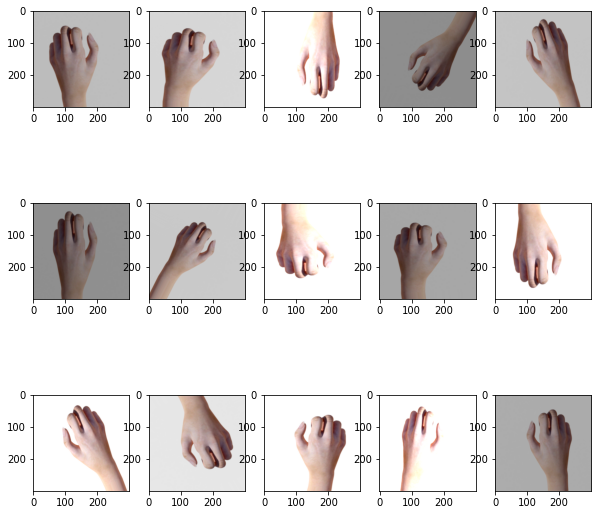

In [17]:
plt.figure(figsize=(10,10))
for i in range(15):
  data = next(train_generator)   # next를 쓰면 이터레이터에서 하나씩 꺼내옴
  image = data[0]
  plt.subplot(3,5,i+1) # 서브플롯은 1부터 시작 -> i+1
  plt.imshow(np.array(image, dtype=np.uint8))

plt.show()

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True,
    shear_range=0.5,
    brightness_range=[0.5,1.5],
    zoom_range=0.2,
    rotation_range = 30,
    fill_mode = 'nearest',
    validation_split=0.2
)

In [21]:
train_generator = train_datagen.flow_from_directory(
                      data_dir,
                      batch_size=128,
                      target_size=(150,150),
                      class_mode='categorical',  # 다중분류
                      subset = 'training'
                  )

Found 2016 images belonging to 3 classes.


In [22]:
val_generator = train_datagen.flow_from_directory(
                      data_dir,
                      batch_size=128,
                      target_size=(150,150),
                      class_mode='categorical',  # 다중분류
                      subset = 'validation'
                  )

Found 504 images belonging to 3 classes.


In [23]:
def build_model():
  model = keras.Sequential([
    layers.Conv2D(64, (3,3), activation = 'relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),   # // 특징 추출 레이어
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
  ])
  return model

In [24]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 64)                2

In [25]:
model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics = ['acc'])  #categorical_crossentropy 원핫이 되어있음

In [26]:
history = model.fit(train_generator, epochs=5, validation_data = val_generator)

Epoch 1/5
16/16 [==============================] - 103s 6s/step - loss: 207.3367 - acc: 0.3899 - val_loss: 1.0259 - val_acc: 0.5060
Epoch 2/5
16/16 [==============================] - 97s 6s/step - loss: 0.8526 - acc: 0.6062 - val_loss: 0.8775 - val_acc: 0.5714
Epoch 3/5
16/16 [==============================] - 88s 5s/step - loss: 0.6664 - acc: 0.7272 - val_loss: 0.7860 - val_acc: 0.6290
Epoch 4/5
16/16 [==============================] - 88s 5s/step - loss: 0.5758 - acc: 0.7783 - val_loss: 0.7587 - val_acc: 0.6389
Epoch 5/5
16/16 [==============================] - 88s 5s/step - loss: 0.4532 - acc: 0.8264 - val_loss: 0.6536 - val_acc: 0.6825


In [27]:
test_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen.flow_from_directory(
    data_dir,
    batch_size=32,
    target_size=(150,150),
    class_mode= 'categorical'
)

Found 2520 images belonging to 3 classes.
